<a href="https://colab.research.google.com/github/Hkhero79/Hk-online-Retail-customer-segmentation/blob/main/Hk_Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
 data = pd.read_excel('/content/drive/MyDrive/Data & Resources/Online Retail.xlsx')

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
data.shape

(541909, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# Total null values in each of the columns
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# Dropping the null values of the description column
data.dropna(subset = ['Description'], inplace = True)
data.dropna(subset=['CustomerID'], axis = 0, inplace = True)

In [10]:
#checking null value
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df_online=data.copy()

In [12]:
df_online.shape

(406829, 8)

In [13]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
# Converting the column to a string type to detect 'C'
df_online['InvoiceNo'] = df_online['InvoiceNo'].apply(str)

In [15]:
# Creating a function to detect cancelled orders
def cancelled_order(rows):
  '''Detects cancelled orders and returns YES or NO accordingly'''
  if 'C' in rows:
    return 'YES'
  else:
    return 'NO'

In [16]:
# Applying the above function and creating a new column to display cancelled orders
df_online['Cancelled'] = df_online['InvoiceNo'].apply(cancelled_order)

In [17]:
# Dropping the cancelled orders
df_online.drop(df_online[df_online['Cancelled'] == 'YES'].index, inplace=True)

In [18]:
# Dropping the cancelled column
df_online.drop('Cancelled', axis = 1, inplace = True)

In [19]:
# Converting the Invoice no column back to a numerical type
df_online['InvoiceNo'] = df_online['InvoiceNo'].apply(int)

In [20]:
# Dropping Stock Code column
df_online.drop('StockCode', axis = 1, inplace = True)

In [21]:
# Using the Invoice date column to extract 
df_online['Day'] = df_online['InvoiceDate'].dt.day
df_online['Month'] = df_online['InvoiceDate'].dt.month
df_online['Year'] = df_online['InvoiceDate'].dt.year

In [22]:
# Dropping the invoice date column
df_online.drop('InvoiceDate', axis = 1, inplace = True)

In [23]:
df_online.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Day,Month,Year
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,13.021823,3.116174,15294.315171,15.042181,7.612537,2010.934259
std,13106.167695,180.420210,22.096788,1713.169877,8.653771,3.416527,0.247829
min,536365.000000,1.000000,0.000000,12346.000000,1.000000,1.000000,2010.000000
25%,549234.000000,2.000000,1.250000,13969.000000,7.000000,5.000000,2011.000000
50%,561893.000000,6.000000,1.950000,15159.000000,15.000000,8.000000,2011.000000
75%,572090.000000,12.000000,3.750000,16795.000000,22.000000,11.000000,2011.000000
max,581587.000000,80995.000000,8142.750000,18287.000000,31.000000,12.000000,2011.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


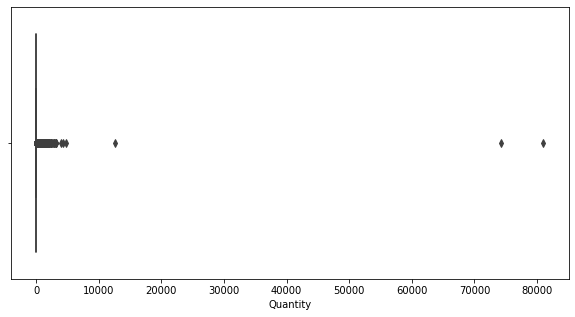

In [24]:
# Distribution of the Quantity column
plt.figure(figsize=(10,5))
sns.boxplot(df_online['Quantity'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


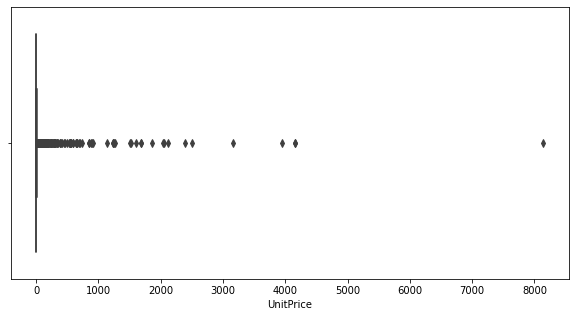

In [25]:
 #Distribution of the Quantity column
plt.figure(figsize=(10,5))
sns.boxplot(df_online['UnitPrice'])
plt.show()

In [26]:
# Creating a function to remove outliers
def remove_outliers(df , column):
  '''Removes outliers in given the dataframe and column'''
  q3 = df[column].quantile(0.75)
  q1 = df[column].quantile(0.25)
  iqr = q3 - q1
  upper_limit = q3 + (1.5 * iqr)
  lower_limit = q1 - (1.5 * iqr)

  if lower_limit < 0:
    df = df[df[column] <= upper_limit]
  else:
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]   
  
  return df

In [27]:
# Removing the outliers using the function created
df_online = remove_outliers(df = df_online, column = 'Quantity')
df_online = remove_outliers(df = df_online, column = 'UnitPrice')

**EDA**

In [28]:
# Top 10 most repeatedly sold items
df_online['Description'].value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    1680
JUMBO BAG RED RETROSPOT               1329
PARTY BUNTING                         1275
LUNCH BAG RED RETROSPOT               1207
ASSORTED COLOUR BIRD ORNAMENT         1159
SET OF 3 CAKE TINS PANTRY DESIGN      1120
LUNCH BAG  BLACK SKULL.               1048
SPOTTY BUNTING                         976
LUNCH BAG SPACEBOY DESIGN              971
PACK OF 72 RETROSPOT CAKE CASES        963
Name: Description, dtype: int64

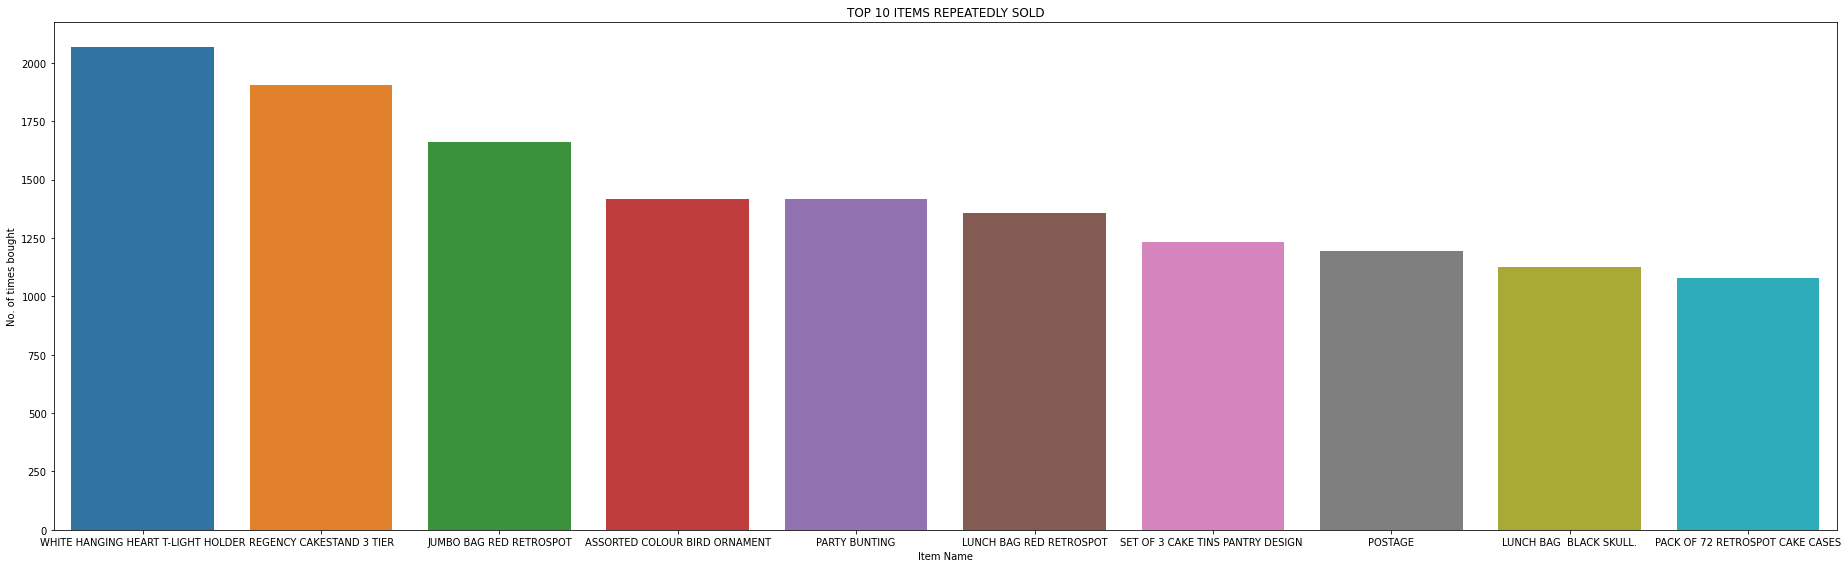

In [29]:
# Barplot of the top 10 most repeatedly sold items
plt.figure(figsize = (26,8))
sns.barplot(x = data['Description'].value_counts()[:10].index, y = data['Description'].value_counts()[:10].values)
plt.xlabel('Item Name')
plt.ylabel('No. of times bought')
plt.title('TOP 10 ITEMS REPEATEDLY SOLD')
plt.tight_layout()

Text(0.5, 1.0, 'TOP 10 COUNTRIES SOLD TO')

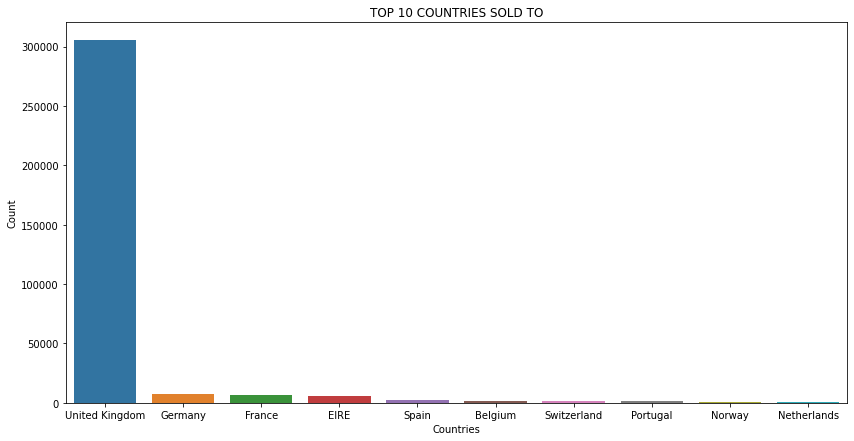

In [30]:
# Top 10 countries that were sold different items
plt.figure(figsize = (14,7))
sns.barplot(x = df_online['Country'].value_counts()[:10].index, y = df_online['Country'].value_counts()[:10].values)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('TOP 10 COUNTRIES SOLD TO')

Text(0.5, 1.0, 'MONTHLY PURCHASES')

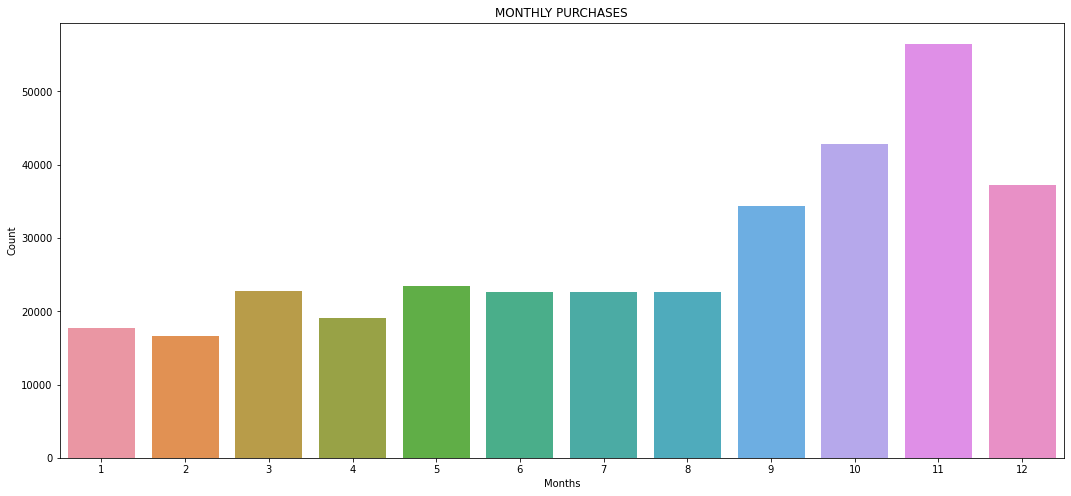

In [31]:
# Monthly purchases
plt.figure(figsize = (18,8))
sns.barplot(x = df_online['Month'].value_counts().index, y = df_online['Month'].value_counts().values)
plt.xlabel('Months')
plt.ylabel('Count')
plt.title('MONTHLY PURCHASES')

In [32]:
# Invoices with most number of items
inv_quantity_10 = df_online.groupby('InvoiceNo').sum()['Quantity'].sort_values(ascending = False)[:10]

Text(0.5, 1.0, 'INVOICE NUMBER AND SUM OF QUANTITIES')

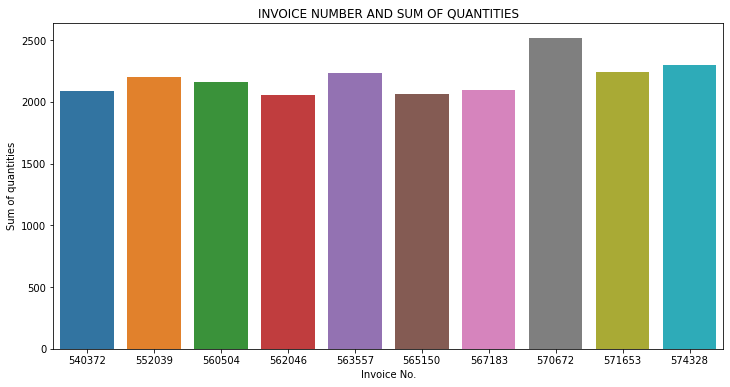

In [33]:
# Barplot for invoices with most number of items
plt.figure(figsize = (12,6))
sns.barplot(x = inv_quantity_10.index, y = inv_quantity_10.values)
plt.xlabel('Invoice No.')
plt.ylabel('Sum of quantities')
plt.title('INVOICE NUMBER AND SUM OF QUANTITIES')

In [34]:
# Top 10 items sold in terms of quantity
item_quantity_10 = df_online.groupby('Description').sum()['Quantity'].sort_values(ascending = False)[:10]

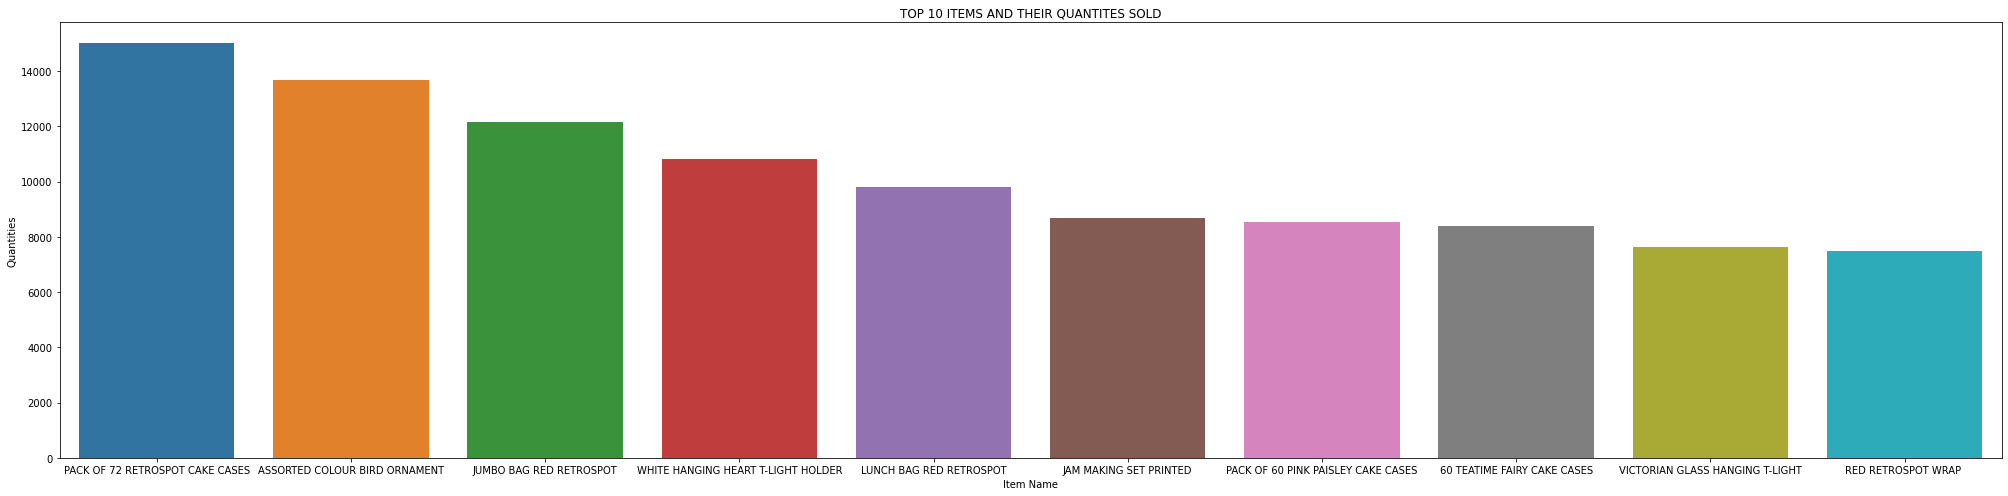

In [35]:
# Barplot of top 10 items sold in terms of quantity
plt.figure(figsize = (28,7))
sns.barplot(x = item_quantity_10.index, y = item_quantity_10.values)
plt.xlabel('Item Name')
plt.ylabel('Quantities')
plt.title('TOP 10 ITEMS AND THEIR QUANTITES SOLD')
plt.tight_layout()

Text(0.5, 1.0, 'CORRELTAION MATRIX')

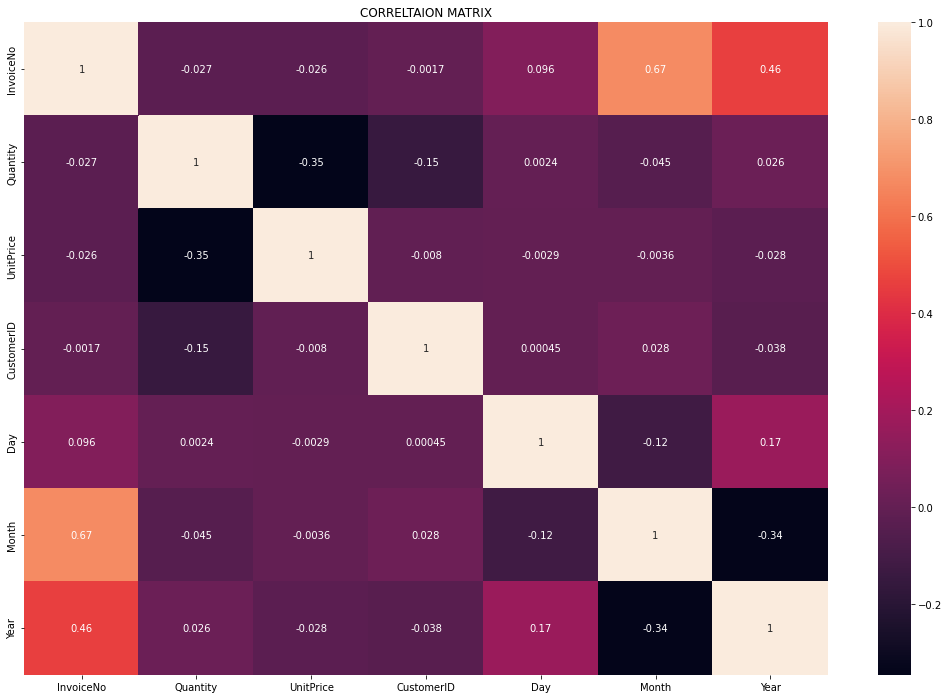

In [36]:
# Correlation between various columns
plt.figure(figsize = (18,12))
sns.heatmap(df_online.corr(), annot = True)
plt.title('CORRELTAION MATRIX')

In [37]:
# Creating an invoice date column
df_online['InvoiceDate'] = pd.to_datetime(df_online[['Day', 'Month', 'Year']])

**Recency**

**Here, the most recent order of customers is identified.**

In [38]:
# Most recent date in the dataset
latest_date = max(df_online['InvoiceDate'])

In [39]:
# Creating a dataframe to find the most recent purchase
recency_df = pd.DataFrame(df_online.groupby('CustomerID').max()['InvoiceDate'], columns = ['InvoiceDate'])
recency_df.reset_index(inplace = True)

In [40]:
# Calculating days from most recent purchase
recency_df['Recency'] = recency_df['InvoiceDate'].apply(lambda x: (latest_date - x).days)
recency_df = recency_df.loc[: , ['CustomerID', 'Recency']]

**Frequency**


**Frequency of purchases by the customers will be calculated.**

In [41]:
# Creating a frequency dataframe
freq_df = pd.DataFrame( df_online.groupby('CustomerID').nunique()['InvoiceNo'])


In [42]:
freq_df.reset_index(inplace = True)
freq_df.columns = ['CustomerID', 'Frequency']

**Monetary**

**Here, the sum of billed value for each customer will be calculated.**

In [43]:
# Creating a dataframe with total billed amount
monetary_df = df_online.loc[:,['CustomerID', 'Quantity', 'UnitPrice']]
monetary_df['TotalAmount'] = monetary_df.loc[:,'Quantity'] * monetary_df.loc[:,'UnitPrice']

In [44]:
# Grouping by customer ID to find total billed amount per customer
monetary_df = pd.DataFrame(monetary_df.groupby('CustomerID').sum()['TotalAmount'])
monetary_df.reset_index(inplace = True)
monetary_df.columns = ['CustomerID', 'Monetary']

In [45]:
# Merging 3 dataframes to form an RFM dataframe
rec_fre = recency_df.merge(freq_df, on = 'CustomerID' )
rfm_df = rec_fre.merge(monetary_df, on = 'CustomerID')

In [46]:
# First 5 rows of the RFM dataframe
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12347.0,2,7,3314.73
1,12348.0,248,3,90.20
2,12349.0,18,1,999.15
3,12350.0,310,1,294.40
4,12352.0,36,7,1130.94


In [47]:
# Information of the RFM dataframe
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4192 non-null   float64
 1   Recency     4192 non-null   int64  
 2   Frequency   4192 non-null   int64  
 3   Monetary    4192 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 163.8 KB


In [48]:
# Making the customer ID the index of the dataframe
rfm_df.set_index('CustomerID', inplace= True)

In [49]:
# Statistical Description of the RFM dataset
rfm_df.describe()

,Recency,Frequency,Monetary
count,4192.000000,4192.000000,4192.000000
mean,91.977576,4.015983,1030.263007
std,99.896494,7.022919,2205.355349
min,0.000000,1.000000,0.000000
25%,17.000000,1.000000,207.850000
50%,50.000000,2.000000,468.665000
75%,143.000000,4.000000,1136.625000
max,373.000000,197.000000,85018.780000


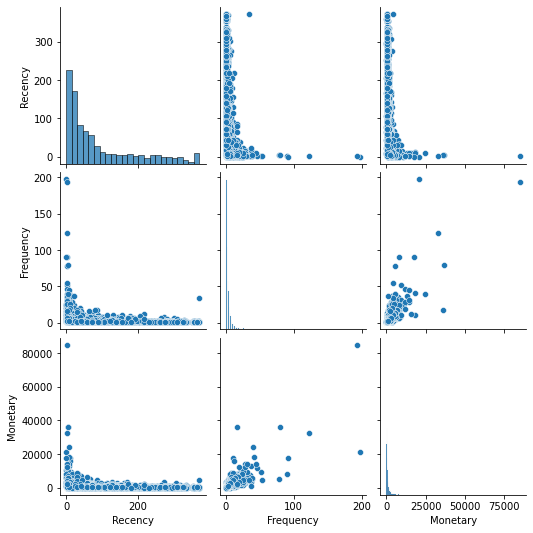

In [50]:
# Graphical representation of the relation between recency, frequency and monetary
sns.pairplot(rfm_df)

 **Above pairplot explains the relation between recency, frequency and monetory variables. Each data point represents a customer.**

In [51]:
# Importing the scaler
from sklearn.preprocessing import StandardScaler, Normalizer

In [52]:
# Creating a copy of the rfm dataframe
rfm_df_copy = rfm_df.copy()

In [53]:

# Scaling the dataframe
scaler = StandardScaler()
normal = Normalizer()
scaled_data = scaler.fit_transform(rfm_df_copy)
scaled_data = normal.fit_transform(scaled_data)
rfm_scaled = pd.DataFrame(scaled_data, columns = ['Recency','Frequency','Monetary'])
rfm_scaled.set_index(rfm_df_copy.index, inplace=True)

In [54]:
# First 5 rows of the scaled data
rfm_scaled.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,-0.626816,0.295692,0.720879
12348.0,0.960887,-0.089003,-0.262249
12349.0,-0.864947,-0.501592,-0.016478
12350.0,0.970328,-0.190932,-0.148350
12352.0,-0.795155,0.602936,0.064780


**CLUSTERING**

In [55]:
# Importing libraries necessary for clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [56]:
# Creating an instance of the model
kmeans = KMeans()

**ELBOW METHOD**

In [57]:
# Using the elbow method to find out optimum number of clusters, with different metrics
def elbow_method(X):
  ''' Displays elbow curves with different metrics '''
  
  metrics = ['distortion', 'calinski_harabasz', 'silhouette']
  
  for m in metrics:
    visualizer = KElbowVisualizer(kmeans, k = (2,10), metric = m)
    visualizer.fit(X)
    visualizer.poof()

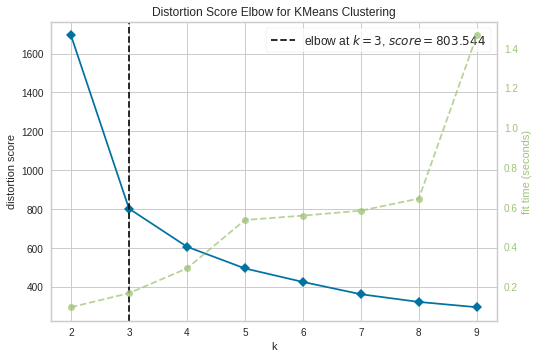

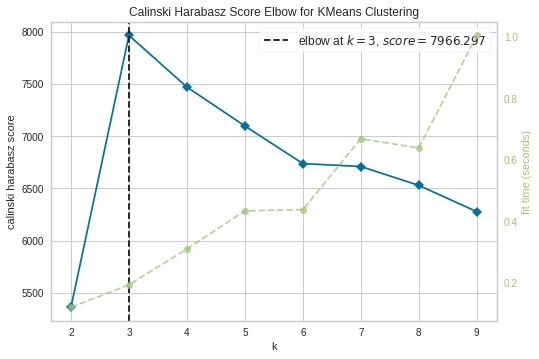

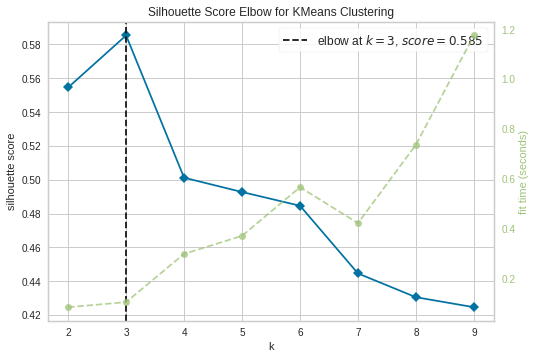

In [58]:
# Using the elbow method function to understand optimum number of clusters
elbow_method(rfm_scaled)


**Silhouette Analysis**

In [59]:
# Creating a function to calculate silhouette scores
def sil_score(input, k):
  ''' Returns a dataframe with sillhouette scores of different clusters in the data '''
  
  sil_df = pd.DataFrame(columns = ['Clusters', 'Silhouette Score'])
  
  for i in range(2,k+1):
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(input)
    score = silhouette_score(input, labels)
    sil_df = sil_df.append({'Clusters' : i,
                            'Silhouette Score' : score}, ignore_index = True)
  
  return sil_df

In [60]:
# Using the function to display silhoutte scores at different number of clusters
sil_score(rfm_scaled,10)

,Clusters,Silhouette Score
0,2.0,0.554560
1,3.0,0.585352
2,4.0,0.501555
3,5.0,0.492704
4,6.0,0.481123
5,7.0,0.444371
6,8.0,0.423931
7,9.0,0.423435
8,10.0,0.397996


In [61]:
# Creating a function for silhouette plot visualization
def sil_visual(input, k):
  ''' Visualize the silhouette plot with different clusters'''

  for i in range(2,k+1):
    kmeans = KMeans(n_clusters = i)
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(input)
    visualizer.poof()

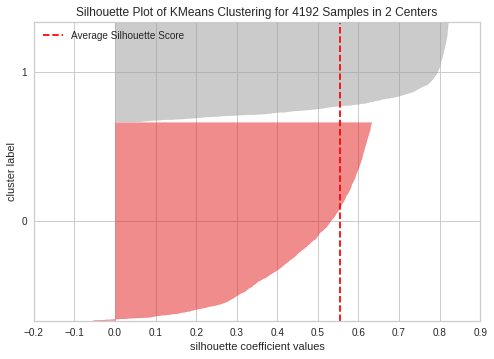

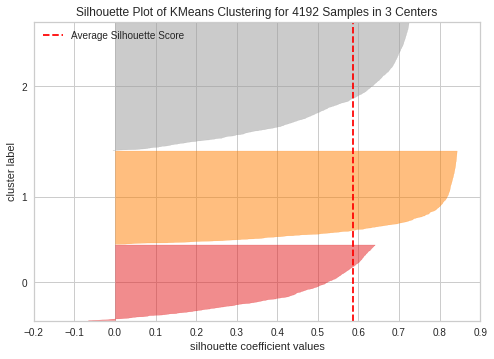

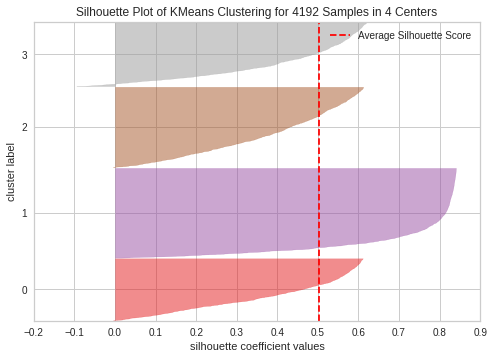

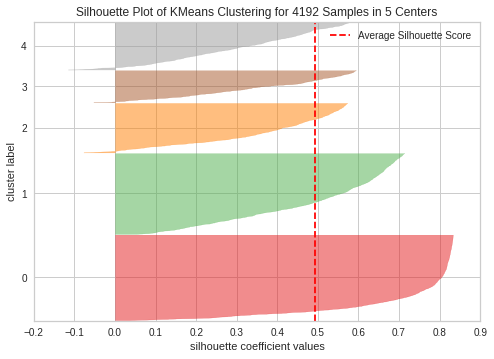

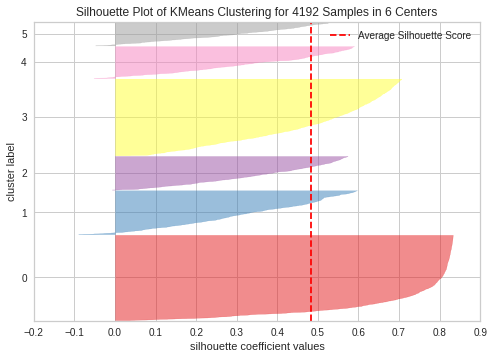

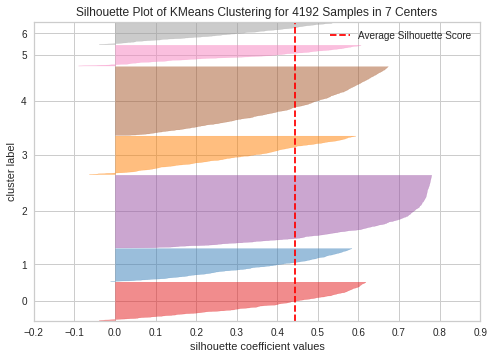

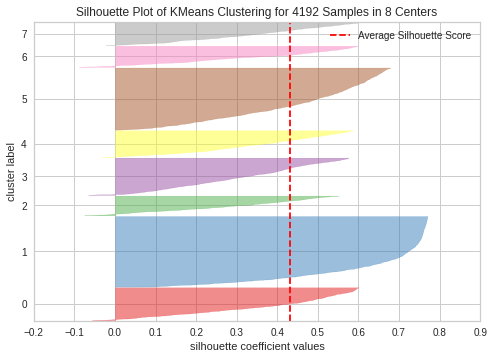

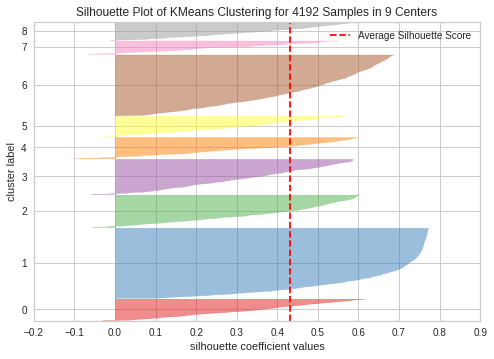

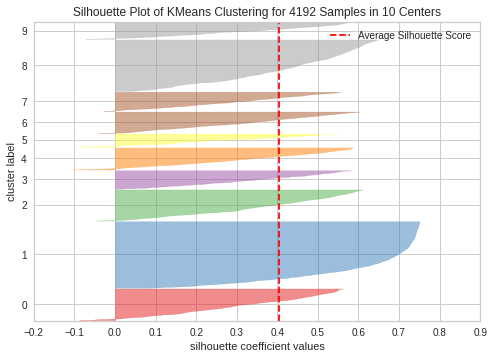

In [62]:
# Applying the silhouette visualization function for different clusters.
sil_visual(rfm_scaled, 10)


In [63]:
# KMeans with 3 clusters
kmeans = KMeans(n_clusters = 3, random_state=10)

In [64]:
# Fitting the model to the data
kmeans.fit(rfm_scaled)

KMeans(n_clusters=3, random_state=10)

In [65]:
# Creating cluster labels for the data and appending it to the RFM dataframe
labels = kmeans.predict(rfm_scaled)
rfm_df_copy['Cluster'] = labels

In [66]:
# First 5 rows of the RFM dataframe after adding the cluster column
rfm_df_copy.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12347.0,2,7,3314.73,2
12348.0,248,3,90.20,0
12349.0,18,1,999.15,1
12350.0,310,1,294.40,0
12352.0,36,7,1130.94,2


**Cluster Profiling**

In [67]:
# Grouping by clusters to understand the profiles
rfm_df_copy.groupby('Cluster').mean()

,Recency,Frequency,Monetary
Cluster,,,
0,219.930303,1.675758,353.290455
1,38.098834,2.171016,455.651145
2,24.879552,10.002801,2830.897675


In [68]:
# Number of customers belonging to each cluster
rfm_df_copy['Cluster'].value_counts()

1    1801
0    1320
2    1071
Name: Cluster, dtype: int64

**cluster 0 comprises of customers who are very recent, frequent and also contribute largely to the sales.**

 **Cluster 1 comprises of customers who are moderately recent, frequent and contribute an average amount to sales**

 **Cluster 2 comprises of customers who made purchaces a long time ago and purchase infrequently and contribute the least towards the sales of the company.**

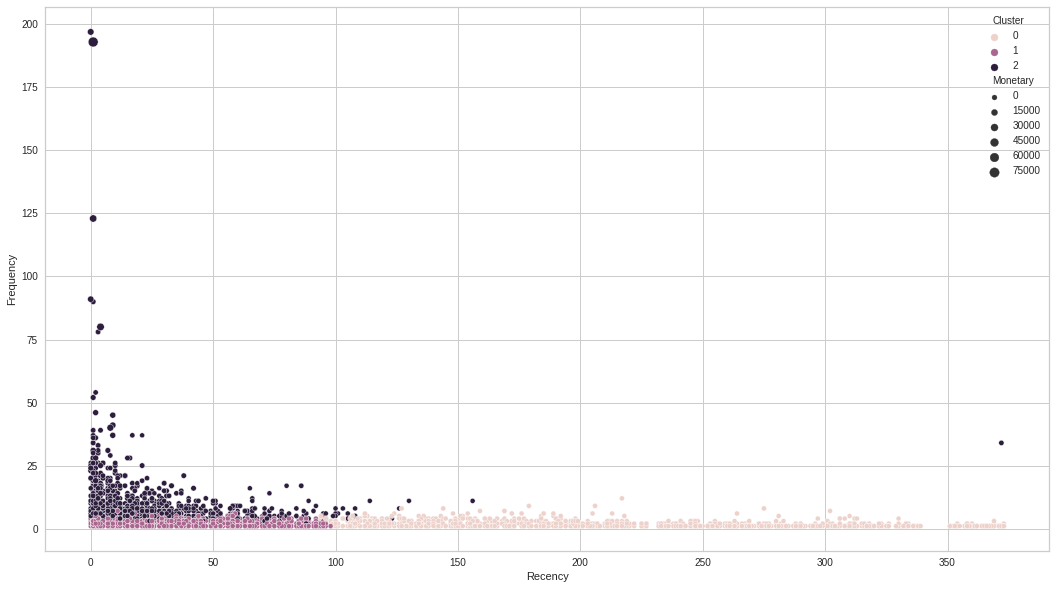

In [69]:
# Creating a scatter plot to understand the clusters visually
plt.figure(figsize = (18,10))
sns.scatterplot(x = rfm_df_copy['Recency'], y = rfm_df_copy['Frequency'], size= rfm_df_copy['Monetary'], hue = rfm_df_copy['Cluster'])

In [70]:
# Library import for dendrogram
import scipy.cluster.hierarchy as shc

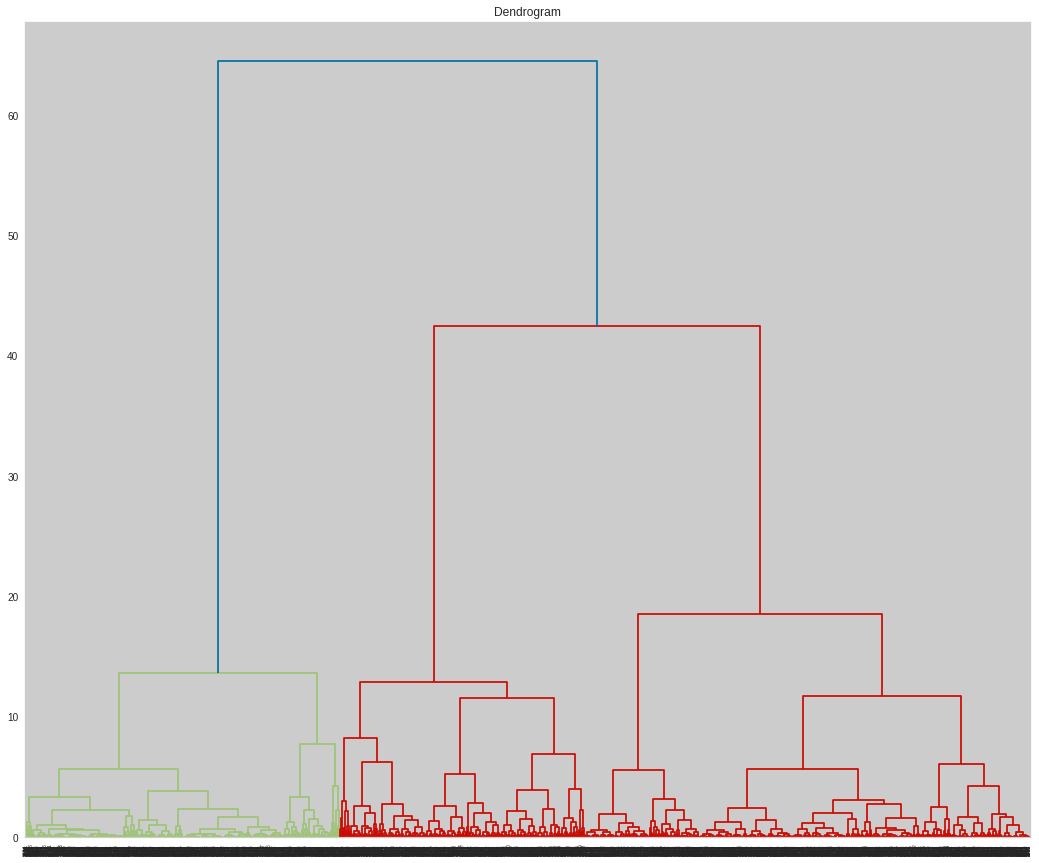

In [71]:
# Creating a dendrogram to visualize the clusters
plt.figure(figsize = (18,15))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(scaled_data, method='ward'))

**CONCLUSION**

**we saw how we can segment our customer depending on our business requirements**

**You can perform RFM for your entire customer base, or just a subset**

 **RFM analysis can help in answering many questions with respect to their customers and this can help companies to make marketing strategies for their customers, retaining their slipping customers and providing recommendations to their customer based on their interest.**

**Using cluster profiling  the average of recency, frequency and monetary values for each customer segment was identified.**

**We used the K-means algorithm to segment our customer in various clusters having similar similarity. I think K-means did a pretty good job here.**